# UoG-DA_Group28 Jupyter Notebook: Pre-Processing

<hr>

## <u> Initial Setup and Exploration </u>

### Library Imports and Misc. Setup

This code block defines essential utiliy and configuration items (imports, methods .etc).

In [1]:
# Import Utils and Configs
from utils import *
from config import *

### Data Importing/Merging

This code block utilized the `import_from_files_single_dataframe` to import/load the dataset from the specified directory(`./UWB_LOS_NLOS_Data_Set/dataset/`).

The directory contains 7 .csv dataset files, each coming from a different indoor environment:

1. Office 1
2. Office 2
3. Small Apartment
4. Small Workshop
5. Kitchen with a living room
6. Bedroom
7. Boiler room

While each specific environment may have unique effects on the CIR measurements, the primary goal of this mini-project is to distinguish between Line-of-Sight (LOS) and Non-Line-of-Sight (NLOS) conditions based on the CIR readings. Since all the environments the data is collected from are indoor environments, it is reasonable to aggregate them together for further analysis, focusing primary on the distinction between LOS and NLOS conditions.

In [2]:
# Import raw data from folder with dataset
print("Importing dataset to Pandas dataframe")
print("-------------------------------")
df = import_from_files_single_dataframe('../UWB_LOS_NLOS_Data_Set/dataset/')

# Displays the concat data and the Head (First 5 rows of dataset) and Tail (Last 5 rows of dataset)
print("\nDataset:")
print("-------------------------------")
print(df)

# Export dataset
save_to_pickle("original_dataset", "./pickled_data_sets", df)

Importing dataset to Pandas dataframe
-------------------------------
../UWB_LOS_NLOS_Data_Set/dataset/uwb_dataset_part1.csv
../UWB_LOS_NLOS_Data_Set/dataset/uwb_dataset_part2.csv
../UWB_LOS_NLOS_Data_Set/dataset/uwb_dataset_part3.csv
../UWB_LOS_NLOS_Data_Set/dataset/uwb_dataset_part4.csv
../UWB_LOS_NLOS_Data_Set/dataset/uwb_dataset_part5.csv
../UWB_LOS_NLOS_Data_Set/dataset/uwb_dataset_part6.csv
../UWB_LOS_NLOS_Data_Set/dataset/uwb_dataset_part7.csv

Dataset:
-------------------------------
       NLOS  RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  \
0       0.0   3.90   745.0  18712.0  10250.0  11576.0         64.0  11855.0   
1       0.0   0.66   749.0  11239.0   6313.0   4712.0         64.0  18968.0   
2       1.0   7.86   746.0   4355.0   5240.0   3478.0         60.0  14699.0   
3       1.0   3.48   750.0   8502.0   8416.0   5890.0         76.0   8748.0   
4       0.0   1.19   746.0  17845.0  18095.0  12058.0         68.0  11380.0   
...     ...    ...     ...   

### General Sanity Check

From the output above, we can see that the data imported/loaded (into dataframe `df`) generally matches with the description in the Mini-Project Description Document. There are all together 42000 samples, with 15 featues and 1 class (1 Class + 14 Single Dimension Features + (1 Feature x 1016 Samples/Dimensions)), which tallies up with the shape (42000 rows x 1031 columns) of the dataframe.

We can also observe that NLOS/LOS class distribution tallies with the numbers described in the Mini-Project Description Document (21000 for LOS and 21000 for NLOS channel condition)

Additional information about the dataframe can also be used to verify the validity of the data imported/loaded (The column, non-null count & datatype)

In [3]:
# Displays the shape of the dataset
print("\nDataset shape:")
print("-------------------------------")
print(df.shape)

# Check LOS/NLOS Distribution
print("\nNLOS distribution:")
print("-------------------------------")
print(df['NLOS'].value_counts(), end='\n')

# Displays general information of the dataset
print("\nDataset data types:")
print("-------------------------------")
print(df.info(
    verbose=True,
    show_counts=True,
    )
)


Dataset shape:
-------------------------------
(42000, 1031)

NLOS distribution:
-------------------------------
NLOS
0.0    21000
1.0    21000
Name: count, dtype: int64

Dataset data types:
-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 1031 columns):
 #     Column       Non-Null Count  Dtype  
---    ------       --------------  -----  
 0     NLOS         42000 non-null  float64
 1     RANGE        42000 non-null  float64
 2     FP_IDX       42000 non-null  float64
 3     FP_AMP1      42000 non-null  float64
 4     FP_AMP2      42000 non-null  float64
 5     FP_AMP3      42000 non-null  float64
 6     STDEV_NOISE  42000 non-null  float64
 7     CIR_PWR      42000 non-null  float64
 8     MAX_NOISE    42000 non-null  float64
 9     RXPACC       42000 non-null  float64
 10    CH           42000 non-null  float64
 11    FRAME_LEN    42000 non-null  float64
 12    PREAM_LEN    42000 non-null  float64
 13  

### Missing Data check/treatment

This code block checks if there are any missing values ('Nulls' or 'NA') in the dataset.

On analysis, there does not seem to be any missing values in the dataset, we can continue to proceed without treating the dataset for missing values

In [31]:
# Check if where are any nulls or missing values in dataset

print("\nAre Missing Values detected in dataframe: ", df.isnull().values.any())

print("\nNumber of Missing Values detected in dataframe by attribute:")
print("-------------------------------")
print(df.isnull().isna().sum())



Are Missing Values detected in dataframe:  False

Number of Missing Values detected in dataframe by attribute:
-------------------------------
NLOS       0
RANGE      0
FP_IDX     0
FP_AMP1    0
FP_AMP2    0
          ..
CIR1011    0
CIR1012    0
CIR1013    0
CIR1014    0
CIR1015    0
Length: 1031, dtype: int64


### Duplicate Data check/treatment

This code block checks if there are any duplicate values in the dataset.

On analysis, there does not seem to be any duplicate values in the dataset, we can continue to proceed without treating the dataset for duplicates.

In [5]:
# Check if there are duplicates in dataset

print("\nAre Duplicates detected in dataframe: ", df.duplicated().values.any())

print("\nNumber of Duplicates detected in dataframe by attribute:")
print("-------------------------------")
print(df.duplicated().sum())


Are Duplicates detected in dataframe:  False

Number of Duplicates detected in dataframe by attribute:
-------------------------------
0


### Distribution Check

We will be utilizing the Kolmogorow-smirnov test to check if the distribution of data in each column follows a normal/gaussian distribution. If the P values is < 0.05, it suggest the data in the column do not follow a normal/gaussian distribution

In [6]:
abnormal_columns = []

for column in df.columns:
    stat, p = kstest(df[column], 'norm')
    print(f'{column}: p-value = {p}')
    if p < 0.05:  # Significance threshold
        abnormal_columns.append(column)

print("\nAbnormal columns:")
print(abnormal_columns)

NLOS: p-value = 0.0
RANGE: p-value = 0.0
FP_IDX: p-value = 0.0
FP_AMP1: p-value = 0.0
FP_AMP2: p-value = 0.0
FP_AMP3: p-value = 0.0
STDEV_NOISE: p-value = 0.0
CIR_PWR: p-value = 0.0
MAX_NOISE: p-value = 0.0
RXPACC: p-value = 0.0
CH: p-value = 0.0
FRAME_LEN: p-value = 0.0
PREAM_LEN: p-value = 0.0
BITRATE: p-value = 0.0
PRFR: p-value = 0.0
CIR0: p-value = 0.0
CIR1: p-value = 0.0
CIR2: p-value = 0.0
CIR3: p-value = 0.0
CIR4: p-value = 0.0
CIR5: p-value = 0.0
CIR6: p-value = 0.0
CIR7: p-value = 0.0
CIR8: p-value = 0.0
CIR9: p-value = 0.0
CIR10: p-value = 0.0
CIR11: p-value = 0.0
CIR12: p-value = 0.0
CIR13: p-value = 0.0
CIR14: p-value = 0.0
CIR15: p-value = 0.0
CIR16: p-value = 0.0
CIR17: p-value = 0.0
CIR18: p-value = 0.0
CIR19: p-value = 0.0
CIR20: p-value = 0.0
CIR21: p-value = 0.0
CIR22: p-value = 0.0
CIR23: p-value = 0.0
CIR24: p-value = 0.0
CIR25: p-value = 0.0
CIR26: p-value = 0.0
CIR27: p-value = 0.0
CIR28: p-value = 0.0
CIR29: p-value = 0.0
CIR30: p-value = 0.0
CIR31: p-value = 0.

## <u> Feature Extraction and Engineering </u>

For pre-processing purposes, we can generally break down the dataset into 2 groups: **CIR (Channel Impulse Response)** and **Non-CIR**.

Referencing the authors' description as well as other research [1][4], a discription of the 2 groups and their composite features are as suc
<ins>CIR group</ins>
- `CIR0` to `CIR1015` (1016 samples with 1 nano-second resolution)

<ins>Non-CIR group</ins>
- Class Feature
    - `NLOS` : Indicates LOS/NLOS Class (0: LOS, 1: NLOS)
- Frame Quality Indicators (quality of messages received [2])
    - `RANGE` : Measured range (time of flight)
    - `FP_IDX` (First Power Index) : Index of detected first path element in CIR accumulator (**16-bit value** reporting the position within the accumulator that the Leading Edge (LDE) algorithm has determined to be the first path)
    - `FP_AMP1` : The amplitude of the sample reported is the magnitude of the accumulator tap at the **index 1** beyond the integer portion of the rising edge `FP_IDX`.
    - `FP_AMP2` :  The amplitude of the sample reported is the magnitude of the accumulator tap at the **index 2** beyond the integer portion of the rising edge `FP_IDX`.
    - `FP_AMP3` : The amplitude of the sample reported is the magnitude of the accumulator tap at the **index 3** beyond the integer portion of the rising edge `FP_IDX`.
    - `STDEV_NOISE` : Standard Deviation of CIR Estimate Noise (**16-bit value** reporting the standard deviation of the noise level seen during the LDE algorithm’s analysis of the accumulator data)
    - `CIR_PWR` : Total Channel Impulse Response Power (**16-bit value** reporting the sum of the squares of the magnitudes of the accumulator from the estimated highest power portion of the channel, which is related to the receive signal power)
    - `MAX_NOISE` : Maximum value of noise detected
    - `RXPACC` : Received RX preamble symbols (Preamble Accumulation Count)
    - `CH` : Channel value
    - `FRAME_LEN` : Length of frame
    - `PREAM_LEN`: Length of preamble
    - `BITRATE` : Message's bit rate
    - `PRFR` : Pulse Reptition Frequency Rate (Mhz)

Note that the 'CIR' features group mainly looks to isolate the 1016 samples of the absolute value of channel impulse response, hence the grouping of the 'CIR_PWR' feature under the 'Non-CIR' feature group. This is done in order to facilitate further feature extraction pertaining to the estimated receive power figure which will be explained further below.

In [7]:
# Separate the data into LOS and NLOS
df_ncir_group = df.iloc[:, :15].copy()
df_cir_group = df.iloc[:, 15:].copy()

In [8]:
print("\nNCIR Group:")
print("-------------------------------")
df_ncir_group


NCIR Group:
-------------------------------


,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,FRAME_LEN,PREAM_LEN,BITRATE,PRFR
0,0.0,3.90,745.0,18712.0,10250.0,11576.0,64.0,11855.0,967.0,611.0,2.0,39.0,1024.0,110.0,64.0
1,0.0,0.66,749.0,11239.0,6313.0,4712.0,64.0,18968.0,1133.0,447.0,2.0,27.0,1024.0,110.0,64.0
2,1.0,7.86,746.0,4355.0,5240.0,3478.0,60.0,14699.0,894.0,723.0,2.0,27.0,1024.0,110.0,64.0
3,1.0,3.48,750.0,8502.0,8416.0,5890.0,76.0,8748.0,1127.0,1024.0,2.0,39.0,1024.0,110.0,64.0
4,0.0,1.19,746.0,17845.0,18095.0,12058.0,68.0,11380.0,1744.0,276.0,2.0,27.0,1024.0,110.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,2.43,745.0,12960.0,17703.0,14948.0,96.0,9987.0,2379.0,276.0,2.0,27.0,1024.0,110.0,64.0
41996,0.0,1.39,745.0,2235.0,15089.0,8796.0,76.0,12559.0,1810.0,281.0,2.0,39.0,1024.0,110.0,64.0
41997,1.0,5.48,747.0,7115.0,6262.0,4584.0,72.0,1435.0,1092.0,1024.0,2.0,39.0,1024.0,110.0,64.0
41998,1.0,3.40,745.0,6662.0,7683.0,5600.0,72.0,1491.0,1077.0,1024.0,2.0,27.0,1024.0,110.0,64.0


In [9]:
print("\nCIR Group:")
print("-------------------------------")
df_cir_group


CIR Group:
-------------------------------


,CIR0,CIR1,CIR2,CIR3,CIR4,CIR5,CIR6,CIR7,CIR8,CIR9,...,CIR1006,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015
0,129.0,312.0,331.0,141.0,160.0,488.0,195.0,144.0,119.0,193.0,...,279.0,458.0,183.0,158.0,198.0,87.0,296.0,505.0,307.0,0.0
1,117.0,163.0,199.0,136.0,142.0,182.0,358.0,123.0,280.0,311.0,...,144.0,334.0,290.0,228.0,187.0,213.0,202.0,89.0,103.0,0.0
2,433.0,240.0,233.0,81.0,143.0,506.0,119.0,272.0,248.0,233.0,...,32.0,373.0,224.0,174.0,124.0,329.0,207.0,96.0,218.0,0.0
3,466.0,247.0,407.0,225.0,279.0,69.0,393.0,436.0,289.0,169.0,...,252.0,173.0,198.0,160.0,434.0,397.0,290.0,155.0,342.0,256.0
4,259.0,239.0,57.0,19.0,88.0,219.0,400.0,151.0,98.0,415.0,...,154.0,209.0,242.0,296.0,87.0,178.0,314.0,247.0,292.0,256.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,202.0,224.0,51.0,300.0,284.0,446.0,425.0,252.0,189.0,162.0,...,180.0,156.0,322.0,378.0,115.0,296.0,452.0,138.0,123.0,0.0
41996,190.0,153.0,199.0,85.0,167.0,268.0,298.0,228.0,185.0,234.0,...,43.0,433.0,517.0,518.0,287.0,169.0,437.0,59.0,296.0,0.0
41997,504.0,363.0,188.0,150.0,260.0,262.0,159.0,480.0,455.0,225.0,...,394.0,475.0,262.0,468.0,247.0,192.0,395.0,335.0,284.0,256.0
41998,337.0,396.0,243.0,245.0,105.0,182.0,397.0,293.0,78.0,203.0,...,397.0,170.0,231.0,231.0,202.0,253.0,128.0,311.0,290.0,0.0


### Feature Extraction - NCIR

Existing literature on UWB LOS and NLOS classification often mentions the use of power measurements to differentiate between the two [5], and this method is also described in the Decawave DWM1000 user manual [3].

The First Path Lower Level (FP), Received Signal Power Level (RX) and their derivative, the Threshold Power (RX-FP), can be derived by extracting and transforming the data from the FP_AMP1, 2, & 3 and CIR_power columns. This process essentially measures the power difference in the received signal. Logically, when the signal is blocked, the difference in power will be greater. A distance is classified as LOS when the threshold power (calculated using equation (3)) is less than 6 dBm, and as NLOS when it exceeds 10 dBm.

##### Feature Creation: `FP_POWER` (First Path Power Level)

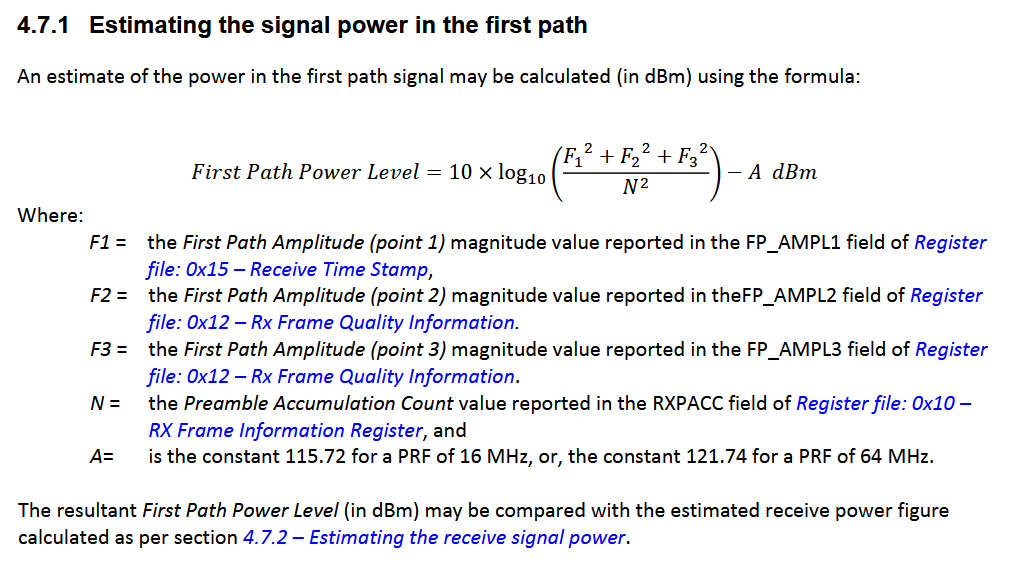

- $F_1$: `FP_AMP1`
- $F_2$: `FP_AMP2`
- $F_3$: `FP_AMP3`
- $N$: `RXPACC`
- $A$: 113.77 or 121.74 depending on value of `PRFR` (16 or 64MHz)

(Image and formula lifted from [3], additional annotations and code lifted from [4])

In [10]:
# Define value of constant A, based on pulse repetition frequency rate
constant_a = 121.74 if df_ncir_group['PRFR'][0] == 64.0 else 113.77 if df_ncir_group['PRFR'][0] == 16.0 else 0

# Compute numerator and denominator
numerator = (df_ncir_group['FP_AMP1']**2) + (df_ncir_group['FP_AMP2']**2) + (df_ncir_group['FP_AMP3']**2)
denominator = df_ncir_group['RXPACC']**2

# Compute FP_POWER (First Path Power Level), ensuring that the numerator is not 0 to prevent log10(0) error
df_ncir_group.loc[numerator != 0.0, 'FP_POWER'] = 10 * np.log10(numerator / denominator) - constant_a
df_ncir_group

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,FRAME_LEN,PREAM_LEN,BITRATE,PRFR,FP_POWER
0,0.0,3.90,745.0,18712.0,10250.0,11576.0,64.0,11855.0,967.0,611.0,2.0,39.0,1024.0,110.0,64.0,-89.758158
1,0.0,0.66,749.0,11239.0,6313.0,4712.0,64.0,18968.0,1133.0,447.0,2.0,27.0,1024.0,110.0,64.0,-91.995986
2,1.0,7.86,746.0,4355.0,5240.0,3478.0,60.0,14699.0,894.0,723.0,2.0,27.0,1024.0,110.0,64.0,-101.249715
3,1.0,3.48,750.0,8502.0,8416.0,5890.0,76.0,8748.0,1127.0,1024.0,2.0,39.0,1024.0,110.0,64.0,-99.446556
4,0.0,1.19,746.0,17845.0,18095.0,12058.0,68.0,11380.0,1744.0,276.0,2.0,27.0,1024.0,110.0,64.0,-81.574943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,2.43,745.0,12960.0,17703.0,14948.0,96.0,9987.0,2379.0,276.0,2.0,27.0,1024.0,110.0,64.0,-82.077520
41996,0.0,1.39,745.0,2235.0,15089.0,8796.0,76.0,12559.0,1810.0,281.0,2.0,39.0,1024.0,110.0,64.0,-85.799910
41997,1.0,5.48,747.0,7115.0,6262.0,4584.0,72.0,1435.0,1092.0,1024.0,2.0,39.0,1024.0,110.0,64.0,-101.498684
41998,1.0,3.40,745.0,6662.0,7683.0,5600.0,72.0,1491.0,1077.0,1024.0,2.0,27.0,1024.0,110.0,64.0,-100.650043


#### Feature Creation: `RX_POWER` (Receive Signal Power Level)

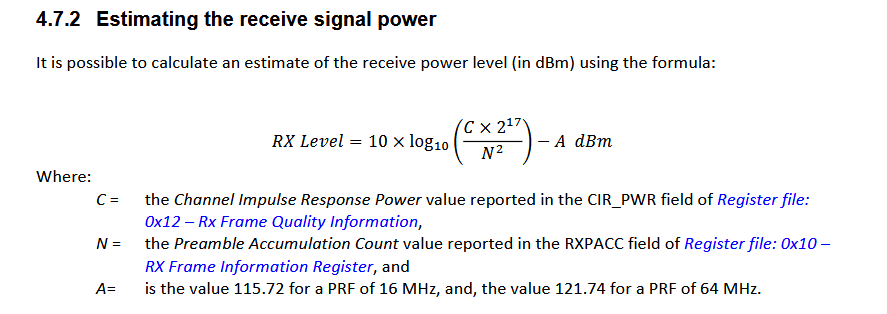

- $C$: `CIR_PWR`
- $N$: `RXPACC`
- $A$: 113.77 or 121.74 depending on value of `PRFR` (16 or 64MHz)

(Image and formula lifted from [3], additional annotations and code lifted from [4])

In [11]:
# Define value of constant A, based on pulse repetition frequency rate
constant_a = 121.74 if df_ncir_group['PRFR'][0] == 64.0 else 113.77 if df_ncir_group['PRFR'][0] == 16.0 else 0

# Compute numerator and denominator
numerator = (df_ncir_group['RXPACC'])*(2**17)
denominator = df_ncir_group['RXPACC']**2

# Compute FP_POWER (First Path Power Level), ensuring that the numerator is not 0 to prevent log10(0) error
df_ncir_group.loc[numerator != 0.0, 'RX_POWER'] = 10 * np.log10(numerator / denominator) - constant_a
df_ncir_group

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,FRAME_LEN,PREAM_LEN,BITRATE,PRFR,FP_POWER,RX_POWER
0,0.0,3.90,745.0,18712.0,10250.0,11576.0,64.0,11855.0,967.0,611.0,2.0,39.0,1024.0,110.0,64.0,-89.758158,-98.425313
1,0.0,0.66,749.0,11239.0,6313.0,4712.0,64.0,18968.0,1133.0,447.0,2.0,27.0,1024.0,110.0,64.0,-91.995986,-97.067976
2,1.0,7.86,746.0,4355.0,5240.0,3478.0,60.0,14699.0,894.0,723.0,2.0,27.0,1024.0,110.0,64.0,-101.249715,-99.156284
3,1.0,3.48,750.0,8502.0,8416.0,5890.0,76.0,8748.0,1127.0,1024.0,2.0,39.0,1024.0,110.0,64.0,-99.446556,-100.667900
4,0.0,1.19,746.0,17845.0,18095.0,12058.0,68.0,11380.0,1744.0,276.0,2.0,27.0,1024.0,110.0,64.0,-81.574943,-94.973992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,2.43,745.0,12960.0,17703.0,14948.0,96.0,9987.0,2379.0,276.0,2.0,27.0,1024.0,110.0,64.0,-82.077520,-94.973992
41996,0.0,1.39,745.0,2235.0,15089.0,8796.0,76.0,12559.0,1810.0,281.0,2.0,39.0,1024.0,110.0,64.0,-85.799910,-95.051964
41997,1.0,5.48,747.0,7115.0,6262.0,4584.0,72.0,1435.0,1092.0,1024.0,2.0,39.0,1024.0,110.0,64.0,-101.498684,-100.667900
41998,1.0,3.40,745.0,6662.0,7683.0,5600.0,72.0,1491.0,1077.0,1024.0,2.0,27.0,1024.0,110.0,64.0,-100.650043,-100.667900


#### Feature Creation: `TH_POWER` (Threshold Power)

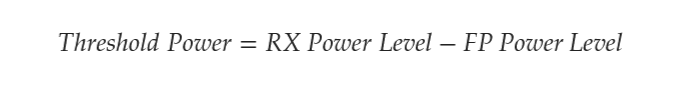

- $RX Power Level$: `RX_POWER`
- $FP Power Level$: `FP_POWER`

In [12]:
# Compute TH_POWER based off RX_POWER and FP_POWER
df_ncir_group['TH_POWER'] = df_ncir_group['RX_POWER'] - df_ncir_group['FP_POWER']
df_ncir_group

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,FRAME_LEN,PREAM_LEN,BITRATE,PRFR,FP_POWER,RX_POWER,TH_POWER
0,0.0,3.90,745.0,18712.0,10250.0,11576.0,64.0,11855.0,967.0,611.0,2.0,39.0,1024.0,110.0,64.0,-89.758158,-98.425313,-8.667154
1,0.0,0.66,749.0,11239.0,6313.0,4712.0,64.0,18968.0,1133.0,447.0,2.0,27.0,1024.0,110.0,64.0,-91.995986,-97.067976,-5.071990
2,1.0,7.86,746.0,4355.0,5240.0,3478.0,60.0,14699.0,894.0,723.0,2.0,27.0,1024.0,110.0,64.0,-101.249715,-99.156284,2.093431
3,1.0,3.48,750.0,8502.0,8416.0,5890.0,76.0,8748.0,1127.0,1024.0,2.0,39.0,1024.0,110.0,64.0,-99.446556,-100.667900,-1.221345
4,0.0,1.19,746.0,17845.0,18095.0,12058.0,68.0,11380.0,1744.0,276.0,2.0,27.0,1024.0,110.0,64.0,-81.574943,-94.973992,-13.399048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,2.43,745.0,12960.0,17703.0,14948.0,96.0,9987.0,2379.0,276.0,2.0,27.0,1024.0,110.0,64.0,-82.077520,-94.973992,-12.896472
41996,0.0,1.39,745.0,2235.0,15089.0,8796.0,76.0,12559.0,1810.0,281.0,2.0,39.0,1024.0,110.0,64.0,-85.799910,-95.051964,-9.252054
41997,1.0,5.48,747.0,7115.0,6262.0,4584.0,72.0,1435.0,1092.0,1024.0,2.0,39.0,1024.0,110.0,64.0,-101.498684,-100.667900,0.830784
41998,1.0,3.40,745.0,6662.0,7683.0,5600.0,72.0,1491.0,1077.0,1024.0,2.0,27.0,1024.0,110.0,64.0,-100.650043,-100.667900,-0.017857


According to the Decawave DWM1000 user manual [3]:
- If `TH_POWER` < 6dB, it is likely to be LOS
- If `TH_POWER` > 10dB, it is likely to be NLOS

In [13]:
# Code entirely lifted from [4] https://github.com/ptrpfa/UWB-LOS-NLOS-Classification/tree/main 

# Analysis of TH_POWER - NLOS/LOS Class
# If TH_POWER < 6dB, LOS
print("TH_POWER < 6dB (Supposed to be LOS)")
# print(df_noncir[df_noncir['D_POWER'] < 6.0]['NLOS'].value_counts())
print({label: f"{count} ({(count / len(df_ncir_group[df_ncir_group['TH_POWER'] < 6.0]['NLOS']) * 100):.2f}%)" for label, count in df_ncir_group[df_ncir_group['TH_POWER'] < 6.0]['NLOS'].value_counts().items()})

# If TH_POWER > 10dB, NLOS
print("TH_POWER > 10dB (Supposed to be NLOS)")
# print(df_noncir[df_noncir['D_POWER'] > 10.0]['NLOS'].value_counts())
print({label: f"{count} ({(count / len(df_ncir_group[df_ncir_group['TH_POWER'] > 10.0]['NLOS']) * 100):.2f}%)" for label, count in df_ncir_group[df_ncir_group['TH_POWER'] > 10.0]['NLOS'].value_counts().items()})

TH_POWER < 6dB (Supposed to be LOS)
{0.0: '20949 (57.01%)', 1.0: '15796 (42.99%)'}
TH_POWER > 10dB (Supposed to be NLOS)
{1.0: '2434 (99.63%)', 0.0: '9 (0.37%)'}


<Axes: xlabel='TH_POWER', ylabel='Count'>

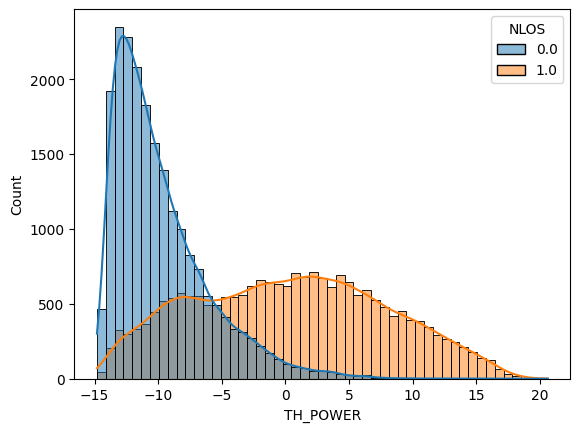

In [14]:
sns.histplot(data=df_ncir_group, x=df_ncir_group['TH_POWER'], hue='NLOS', kde=True, stat='count', common_norm=False)

This exploration reveals that the DWM1000's characterization of the relationship between 'TH_POWER' and NLOS/LOS classification is generally valid when 'TH_POWER' > 10 dB. However, this relationship becomes less reliable when 'TH_POWER' falls < 6 dB. Additionally, the histogram indicates a lack of clear distinction between NLOS and LOS in the range of -15 to 6 dB for 'TH_POWER'. This suggests that relying on 'TH_POWER' as a distinguishing feature may not be a prudent approach.

### Feature Extraction -  CIR

Given the large dimension of the CIR feature, we need to look for a way to obtain single-valued measure as a way to concisely represent the 1016 samples

We will be looking at the following features:

- `CIR_MEAN`
- `CIR_MEDIAN`
- `CIR_MAX`
- `CIR_SUM`

These measurements are chosen as general aggregations of the CIR sample

- `CIR_KURTOSIS`
- `CIR_FP`

Other Measurements brought up in research papers as a means to distinguish between NLOS and LOS based on the multi-path channel statistics such as Kurtosis, Mean Excess Delay Spread and RMS Delay Spread .etc. the The Mini-Project Description Document and the floor-plan shown in the original research paper [2] the dataset was derived from don't preclude the possibility of the signal taking alternate pathways even if it if NLOS

For convenience sake, Kurtosis has been selected over Mean Excess Delay Spread and RMS Delay Spread as the Pandas library already has an function to easily calculate it

We can also derive at the First Path CIR utilizing the `FP_IDX` column, this might be relevant to our prediction as the First Path CIR signal may be less impacted by NLOS signal interference


In [15]:
df_cir_group_aggregate = pd.DataFrame({'CIR_MEAN': df_cir_group.mean(axis=1)})

df_cir_group_aggregate['CIR_MEDIAN'] = df_cir_group.median(axis=1)    

df_cir_group_aggregate['CIR_MAX'] = df_cir_group.max(axis=1)  

df_cir_group_aggregate['CIR_SUM'] = df_cir_group.sum(axis=1)  

df_cir_group_aggregate['CIR_KURTOSIS'] = df_cir_group.kurtosis(axis=1)

df_cir_group_aggregate["CIR_FP"] = df.apply(lambda row: row[f"CIR{int(row['FP_IDX'])}"] if f"CIR{int(row['FP_IDX'])}" in df.columns else None, axis=1)

df_cir_group_aggregate


,CIR_MEAN,CIR_MEDIAN,CIR_MAX,CIR_SUM,CIR_KURTOSIS,CIR_FP
0,395.225394,221.0,23077.0,401549.0,145.680415,11573.0
1,444.060039,210.5,18059.0,451165.0,77.420815,1840.0
2,503.485236,231.5,16809.0,511541.0,58.677750,1212.0
3,413.054134,256.0,15742.0,419663.0,106.180924,2907.0
4,363.357283,228.0,19583.0,369171.0,152.210034,11949.0
...,...,...,...,...,...,...
41995,424.630906,242.0,17626.0,431425.0,111.131170,3521.0
41996,424.798228,229.0,21615.0,431595.0,123.393925,7862.0
41997,343.982283,270.5,5908.0,349486.0,99.529840,4445.0
41998,298.593504,235.5,7611.0,303371.0,144.606265,6026.0


### Exploratory Data Analysis (EDA) - NCIR

In [16]:
# Description of dataset
df_ncir_group.describe()

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,FRAME_LEN,PREAM_LEN,BITRATE,PRFR,FP_POWER,RX_POWER,TH_POWER
count,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.0,42000.000000,42000.000000,42000.0,42000.0,42000.000000,42000.000000,42000.000000
mean,0.500000,3.831519,745.654167,8127.521905,11425.259524,9738.106048,72.284571,9789.690214,1316.096524,616.27250,2.0,33.801762,1042.980571,110.0,64.0,-93.148632,-97.883870,-4.735238
std,0.500006,2.355976,4.505024,5393.330697,6235.434769,5352.311549,29.318995,4912.556005,582.434989,306.78537,0.0,5.946221,96.736825,0.0,0.0,9.685366,2.277022,7.804782
min,0.000000,0.000000,707.000000,7.000000,63.000000,187.000000,28.000000,0.000000,310.000000,128.00000,2.0,27.000000,1024.000000,110.0,64.0,-119.540034,-100.801540,-14.808225
25%,0.000000,1.810000,744.000000,3573.750000,5322.750000,4723.000000,56.000000,6727.000000,961.000000,318.00000,2.0,27.000000,1024.000000,110.0,64.0,-100.853440,-100.667900,-11.268814
50%,0.500000,3.480000,746.000000,7140.000000,12318.000000,10262.000000,68.000000,9950.500000,1134.000000,513.00000,2.0,39.000000,1024.000000,110.0,64.0,-90.734736,-97.666074,-7.185931
75%,1.000000,5.420000,748.000000,12273.000000,17310.000000,14256.000000,80.000000,12443.000000,1488.000000,1024.00000,2.0,39.000000,1024.000000,110.0,64.0,-84.690014,-95.589172,0.818847
max,1.000000,28.020000,848.000000,20572.000000,20624.000000,20577.000000,324.000000,37208.000000,5169.000000,1056.00000,2.0,39.000000,1536.000000,110.0,64.0,-80.141829,-91.637000,20.638214


Looking at the description of the NCIR dataframe, we can see that `CH`, `BITRATE` and `PRFR` have a Standard Deviation of 0, this implies that all elements in the column are equal. We can flag these for  potential discarding these values as they will not offer any meaningful insight into the data.

#### Distribution


Histogram of for Non-CIR Features:
-------------------------------


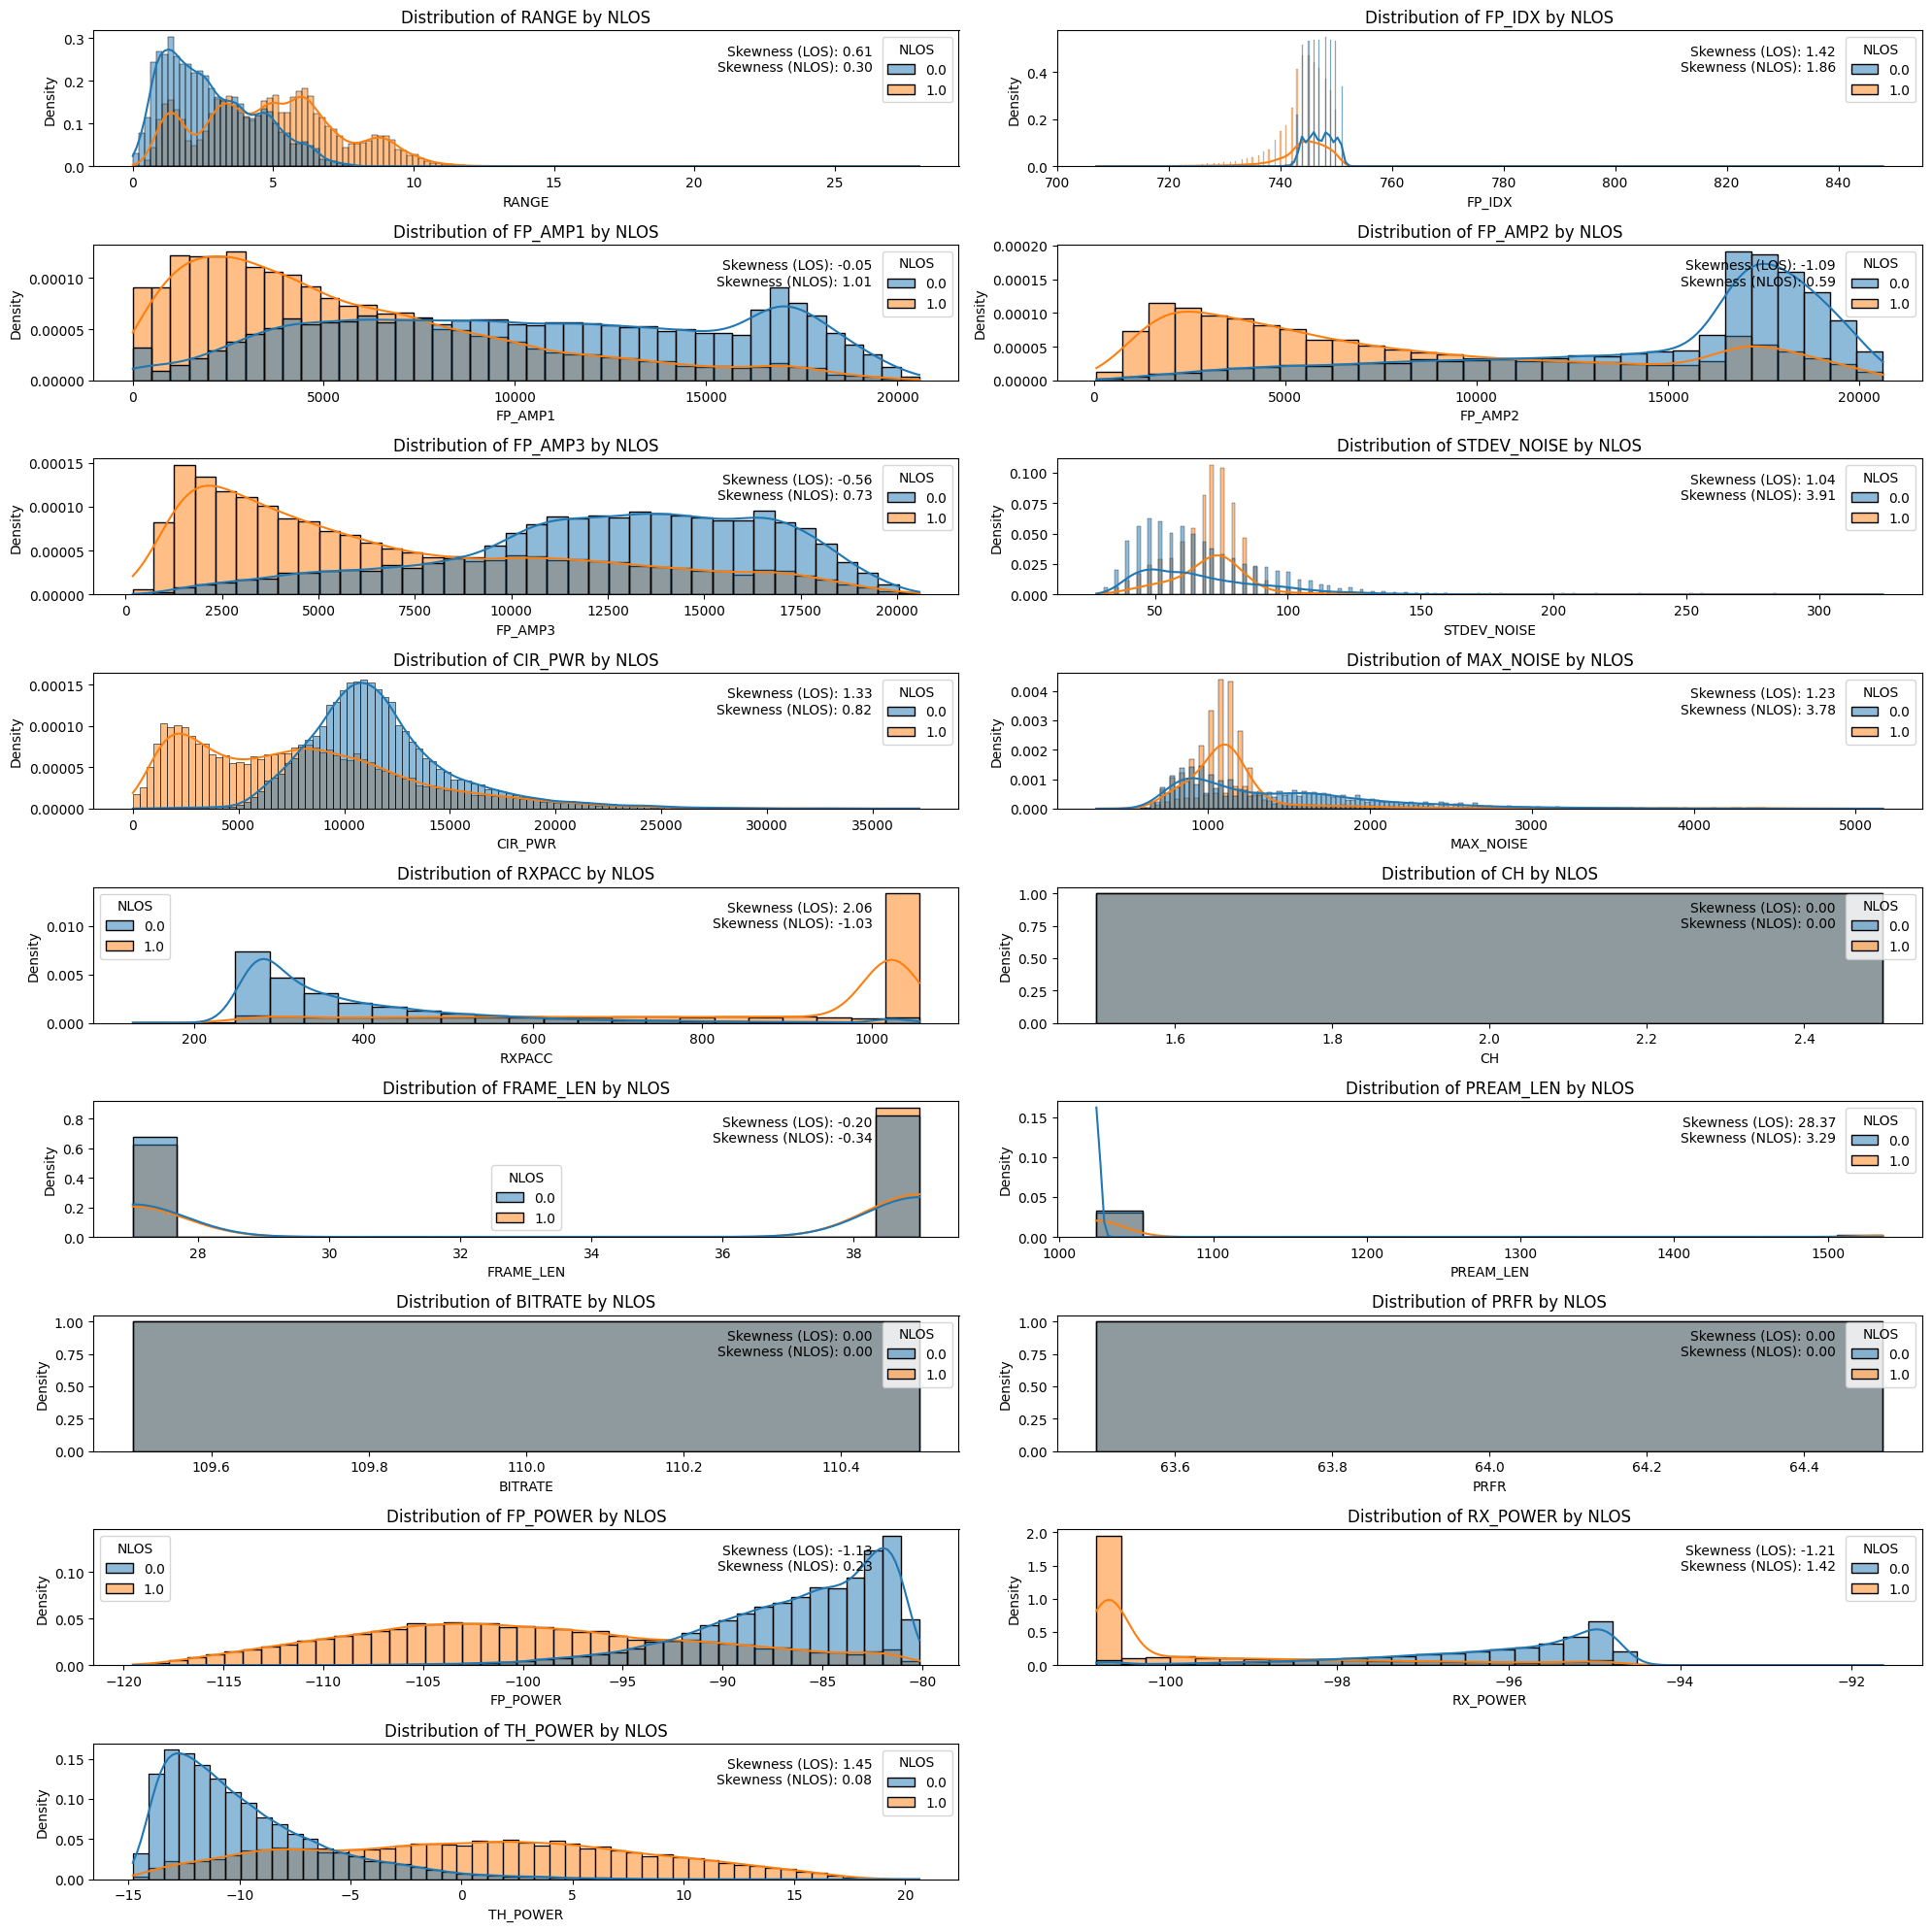

In [17]:
# Histogram of dataset to understand distribution except for NLOS (Label)
print("\nHistogram of for Non-CIR Features:")
print("-------------------------------")
plot_histogram(df_ncir_group)

Looking at the histogram NCIR dataframe, we can see that while certain attributes show distinctly skewed NLOS and LOS values, most if not all attributes also contain signifcant overlap between the two with the exeption of `CH`, `BITRATE` and `PRFR` (due to them all being of the same value). Invidiually, none of the attributes are able to cleanly segregate NLOS and LOS values.

#### Correlation


Correlation heatmap for Non-CIR Features:
-------------------------------


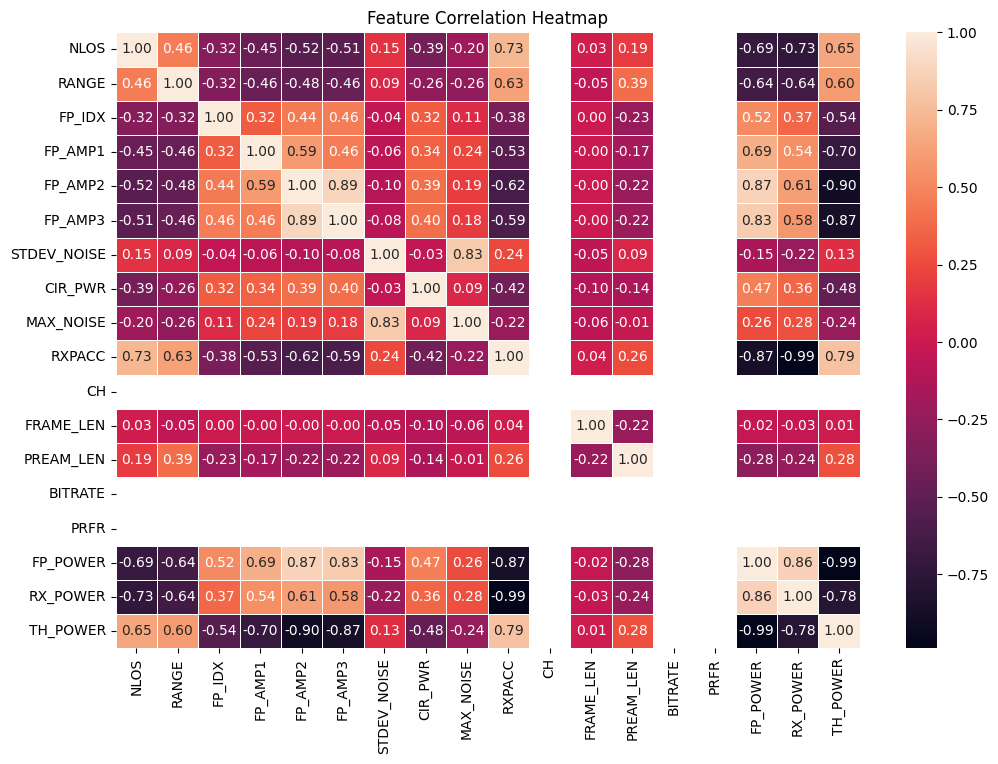

In [18]:
# Correlation with heatmap to identify and investigate relationships
print("\nCorrelation heatmap for Non-CIR Features:")
print("-------------------------------")
plt.figure(figsize=(12, 8))
plt.title("Feature Correlation Heatmap")
sns.heatmap(df_ncir_group.corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.show()

Looking at the correlation heatmap, there are noticable clusters of correlated attibutes, especially between derived attributes (`TH_POWER`, `RX_POWER`, `FP_POWER`) and their constituent derivative attributes (`FP_AMP1`, `FP_AMP2`, `FP_AMP3`, `RXPACC`). It is also interesting to note that `FRAME_LEN` has extremely low correlation with almost all other attributes except with `PREAM_LEN`.

#### Feature importance


Top features for Non-CIR Features:
-------------------------------


,Feature,Importance
15,RX_POWER,0.218658
8,RXPACC,0.175504
14,FP_POWER,0.123103
0,RANGE,0.110326
6,CIR_PWR,0.081792
16,TH_POWER,0.072771
7,MAX_NOISE,0.048612
3,FP_AMP2,0.045894
4,FP_AMP3,0.043860
2,FP_AMP1,0.031964


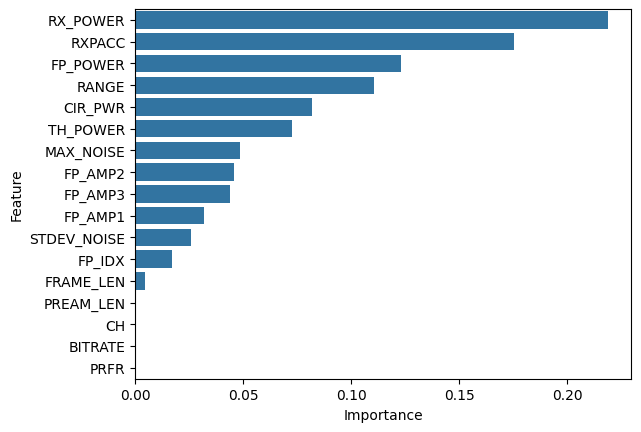

In [19]:
# `RandomForestClassifier` based on Decision Trees to weigh the importance of all features
print("\nTop features for Non-CIR Features:")
print("-------------------------------")
df_ncir_group_importance =  get_top_features(df_ncir_group)

sns.barplot(x="Importance", y="Feature", data=df_ncir_group_importance, orient = 'h')
plt.show

df_ncir_group_importance

Based off the importance score, only `RX_POWER`, `RXPACC`, `RANGE` and `FP_POWER` have significant importance metrics ( >0.1), from the subsequent bar chart, we can also see that attributes `PREAM_LEN`, `CH`, `BITRATE` and `PRFR` have zero or near-zero importance


### Exploratory Data Analysis (EDA) - CIR

In [20]:
# Description of dataset
df_cir_group_aggregate.describe()

,CIR_MEAN,CIR_MEDIAN,CIR_MAX,CIR_SUM,CIR_KURTOSIS,CIR_FP
count,42000.000000,42000.000000,42000.000000,4.200000e+04,42000.000000,42000.000000
mean,415.931580,247.108952,15806.424571,4.225865e+05,112.133500,7166.652952
std,91.968919,61.105073,4584.784639,9.344042e+04,48.643603,4723.724767
min,186.248031,154.000000,431.000000,1.892280e+05,-1.148589,4.000000
25%,352.906004,218.000000,14007.750000,3.585525e+05,73.685130,3025.000000
50%,393.891732,233.500000,16993.500000,4.001940e+05,107.224618,6382.000000
75%,456.436270,260.000000,18639.000000,4.637392e+05,145.743819,10802.250000
max,1051.989173,838.500000,23501.000000,1.068821e+06,328.208651,19884.000000


There are no notable observations from the CIR aggregate dataframe description

#### Distribution


Histogram of for CIR aggregate Features:
-------------------------------


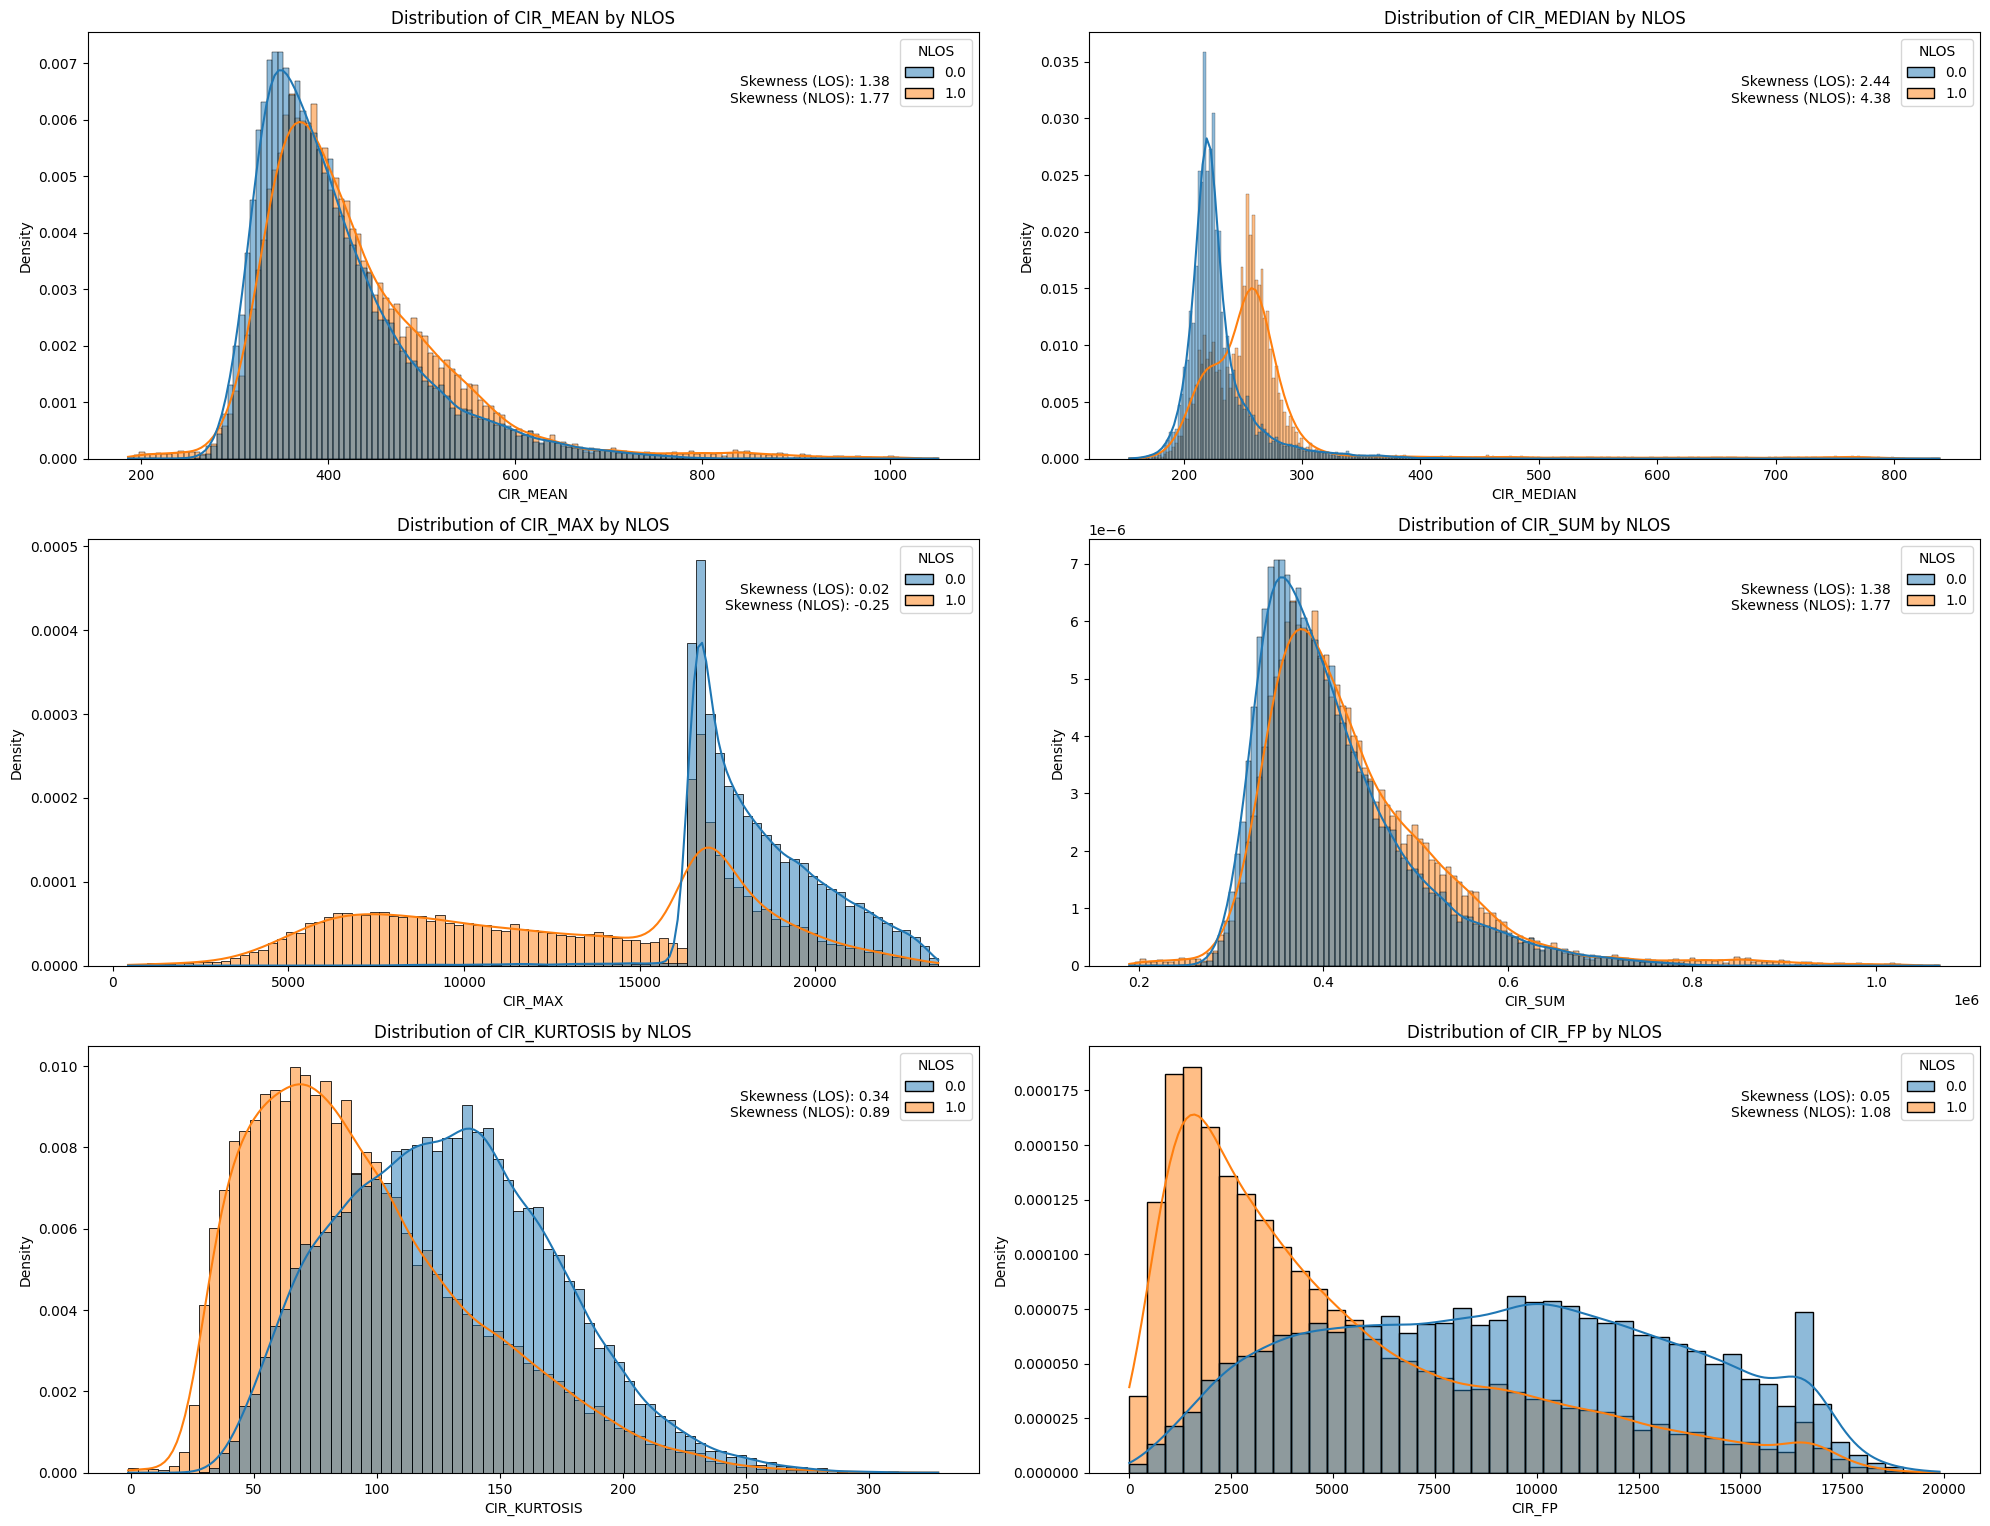

In [21]:
# Histogram of dataset to understand distribution except for NLOS (Label)
print("\nHistogram of for CIR aggregate Features:")
print("-------------------------------")
df_cir_group_aggregate['NLOS']  = df['NLOS']  # NLOS column is added for analysis purposes
plot_histogram(df_cir_group_aggregate)

Looking at the histogram for the CIR aggregate dataframe, we can see that while certain attributes show distinctly skewed NLOS and LOS values, most if not all attributes also contain significant overlap between the two with  `CIR_MEAN` and `CIR_SUM` showing almost complete overlaps between NLOS and LOS values (we can look into eliminating these 2 values). Another interesting observation is that the `CIR_FP` looks similar to an inverted `FP_POWER` histogram.

Similar to the NCIR group, none of the CIR aggregate attributes are able to cleanly segregate NLOS and LOS values.

#### correlation


Correlation heatmap for CIR aggregate Features:
-------------------------------


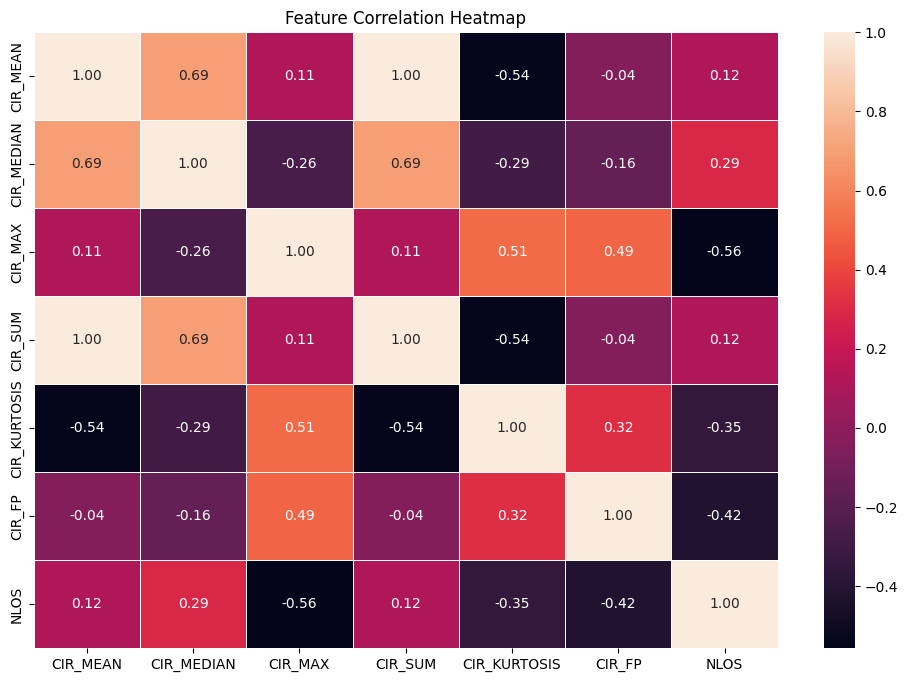

In [22]:
# Correlation with heatmap to identify and investigate relationships
print("\nCorrelation heatmap for CIR aggregate Features:")
print("-------------------------------")
plt.figure(figsize=(12, 8))
plt.title("Feature Correlation Heatmap")
sns.heatmap(df_cir_group_aggregate.corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.show()

Looking at the correlation heatmap, there are no noticable correlations between any of the other CIR aggregate values or NLOS, as such no notable observations from the CIR aggregate dataframe description

#### Feature importance


Top features for Non-CIR Features:
-------------------------------


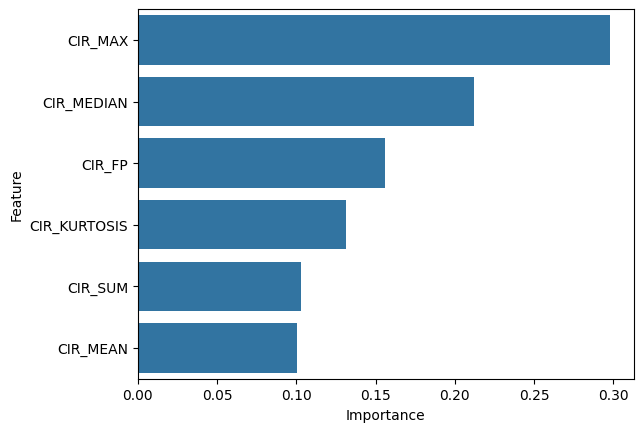

In [23]:
# `RandomForestClassifier` based on Decision Trees to weigh the importance of all features
print("\nTop features for Non-CIR Features:")
print("-------------------------------")
df_cir_group_aggregate_importance =  get_top_features(df_cir_group_aggregate)

sns.barplot(x="Importance", y="Feature", data=df_cir_group_aggregate_importance, orient = 'h')
plt.show

df_cir_group_aggregate_importance

df_cir_group_aggregate = df_cir_group_aggregate.drop(columns=['NLOS'])

Based off the importance score, all attributes have significant importance metrics ( >0.1)


### Data reduction

Based on the insights we gathered from the EDA phases for NCIR and CIR data groups, we can look to reduce the dataset by eliminating certain attributes 

In [24]:
df_ncir_group_reduced = df_ncir_group.drop(columns=['CH', 'BITRATE', 'PRFR', 'FP_AMP1', 'FP_AMP2', 'FP_AMP3', 'RXPACC', 'FP_IDX', 'PREAM_LEN'])

df_ncir_group_reduced 

,NLOS,RANGE,STDEV_NOISE,CIR_PWR,MAX_NOISE,FRAME_LEN,FP_POWER,RX_POWER,TH_POWER
0,0.0,3.90,64.0,11855.0,967.0,39.0,-89.758158,-98.425313,-8.667154
1,0.0,0.66,64.0,18968.0,1133.0,27.0,-91.995986,-97.067976,-5.071990
2,1.0,7.86,60.0,14699.0,894.0,27.0,-101.249715,-99.156284,2.093431
3,1.0,3.48,76.0,8748.0,1127.0,39.0,-99.446556,-100.667900,-1.221345
4,0.0,1.19,68.0,11380.0,1744.0,27.0,-81.574943,-94.973992,-13.399048
...,...,...,...,...,...,...,...,...,...
41995,0.0,2.43,96.0,9987.0,2379.0,27.0,-82.077520,-94.973992,-12.896472
41996,0.0,1.39,76.0,12559.0,1810.0,39.0,-85.799910,-95.051964,-9.252054
41997,1.0,5.48,72.0,1435.0,1092.0,39.0,-101.498684,-100.667900,0.830784
41998,1.0,3.40,72.0,1491.0,1077.0,27.0,-100.650043,-100.667900,-0.017857


We will look to Remove the following attributes from the NCIR group dataframe:
- `CH`
- `BITRATE` 
- `PRFR`
- `FP_AMP1` 
- `FP_AMP3` 
- `FP_AMP3` 
- `RXPACC`
- `FP_IDX`
- `PREAM_LEN`

For NCIR group we will drop attributes `CH`, `BITRATE`, `PRFR` due each column carrying single values. `FP_AMP1`, `FP_AMP3`, `FP_AMP3`, `RXPACC` can be dropped as they have been used to calculate `FP_POWER` and `RX_POWER`. From the domain knowledge derived from the original literature, we can also look to drop `FP_IDX` as it used to derive `CIR_FP`. We can also drop `PREAM_LEN` due to it's low importance.

In [25]:
df_cir_group_aggregate_reduced = df_cir_group_aggregate.drop(columns=['CIR_SUM', 'CIR_MEAN'])

df_cir_group_aggregate_reduced 

,CIR_MEDIAN,CIR_MAX,CIR_KURTOSIS,CIR_FP
0,221.0,23077.0,145.680415,11573.0
1,210.5,18059.0,77.420815,1840.0
2,231.5,16809.0,58.677750,1212.0
3,256.0,15742.0,106.180924,2907.0
4,228.0,19583.0,152.210034,11949.0
...,...,...,...,...
41995,242.0,17626.0,111.131170,3521.0
41996,229.0,21615.0,123.393925,7862.0
41997,270.5,5908.0,99.529840,4445.0
41998,235.5,7611.0,144.606265,6026.0


We will look to Remove the following attributes from the CIR aggregate group:
- `CIR_SUM`
- `CIR_MEAN` 

These attributes were dropped due to the significant overlap between the NLOS and LOS distributions (as seen in the histograms in the 'Exploratory Data Analysis (EDA) - CIR' section). 

Since the CIR aggregate group produces relatively unsatisfactory aggregations of the CIR data, we can look for alternate other ways of rerepresenting the CIR data while achieving a level of conciseness. One alternate way we can achieve this is via PCA. We will look to see how many PCs are required to achieve 90% explained variance and then fit the CIR data to obtain the PCs.

Eigen Variance Energy Ratio:
 [0.24831053 0.13785494 0.10731537 0.06606893 0.04480073 0.03699656
 0.03264655 0.02959236 0.0266203  0.0227534  0.02063685 0.01841325
 0.01622003 0.01436552 0.01309912 0.01132877 0.01035855 0.00918877
 0.00852882 0.00761432 0.00715507 0.00643838 0.00589289 0.00521955
 0.00470025 0.00440181 0.00420683 0.00379819 0.00348356 0.00313867
 0.00289335 0.00275437 0.0026677  0.00232569 0.00219706 0.00194057
 0.00183719 0.00165716 0.00155956 0.00138781 0.00136938 0.00128384
 0.00122022 0.00111084 0.0010214  0.00096222 0.00088776 0.00085984
 0.00082582 0.00078158]

Cumulative Eigen Variance Energy Ratio:
 [0.24831053 0.38616547 0.49348084 0.55954978 0.6043505  0.64134706
 0.67399361 0.70358597 0.73020627 0.75295967 0.77359652 0.79200976
 0.8082298  0.82259532 0.83569444 0.84702321 0.85738176 0.86657052
 0.87509934 0.88271366 0.88986873 0.89630711 0.9022     0.90741955
 0.9121198  0.91652161 0.92072844 0.92452663 0.92801019 0.93114887
 0.93404222 0.93679659 0.93946429

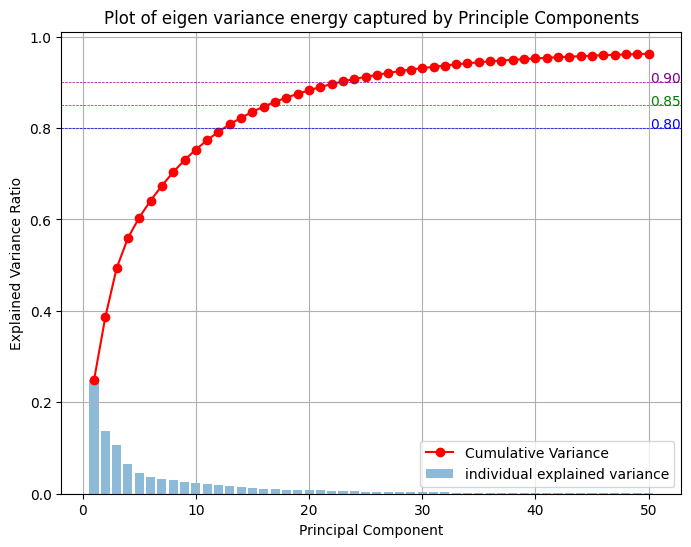

In [26]:
# Code entirely lifted from [4] https://github.com/ptrpfa/UWB-LOS-NLOS-Classification/tree/main

# Define PCA object (all components are kept since n_components is not set)
pca = PCA()
pca.fit(df_cir_group)

# Calculate explained variance ratio (eigen energy)
eigen_energy = pca.explained_variance_ratio_[:50]   # Consider only the first 50 components
cumulative_variance = np.cumsum(eigen_energy)       # Cumulative explained variance
print("Eigen Variance Energy Ratio:\n", eigen_energy, end="\n\n")
print("Cumulative Eigen Variance Energy Ratio:\n", cumulative_variance, end="\n\n")

# Get minimum PC for minimum required total variance energy
min_pc = 0
for idx, i in enumerate(cumulative_variance):
    if(i >= 0.90):
        min_pc = idx + 1
        print("Minimum PCs required:", min_pc)
        print("Total Captured Variance Energy:", i, end="\n\n")
        break

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(eigen_energy) + 1), eigen_energy, alpha=0.5, align='center', label=f'individual explained variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, color='red', marker='o', label='Cumulative Variance')

# Plot horizontal lines for specified thresholds
thresholds = [0.80, 0.85, 0.90]
threshold_colors = ['blue', 'green', 'purple']
for threshold, color in zip(thresholds, threshold_colors):
    plt.axhline(y=threshold, color=color, linestyle='--', linewidth=0.5)
    plt.text(len(cumulative_variance) + 0.1, threshold, f'{threshold:.2f}', color=color)

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title(f"Plot of eigen variance energy captured by Principle Components")
plt.legend()
plt.grid(True)
plt.show()

In [30]:
pca = PCA(n_components=min_pc)
df_cir_pca = pca.fit_transform(df_cir_group)

# Create a DataFrame for the PCA-transformed features
pca_columns = [f'PC{i+1}' for i in range(min_pc)]  
df_cir_pca = pd.DataFrame(df_cir_pca, columns=pca_columns)
df_cir_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,10542.237793,10442.542305,-2905.567297,-1828.041867,-6209.317047,-3182.807155,-2951.346415,-979.644746,3894.661775,-7262.682488,...,3284.574811,-2799.995768,110.079208,-2773.396482,3604.151010,3579.283860,-1213.551384,2675.862743,-3055.585365,3389.533128
1,-27872.624304,1550.982824,-8485.147606,8705.706506,-6799.997935,-3434.054689,-2047.683383,-7300.405082,-6298.147985,-2550.796276,...,1539.386291,-1015.801468,-294.688003,-2953.895231,-461.503570,-3595.683659,3000.847793,-1630.693971,5129.274798,-2413.999397
2,-16005.857827,534.227970,-11330.934957,-1447.770837,-4459.055214,984.633420,1919.055667,5276.332702,5549.689755,-616.845761,...,7772.879031,-3830.014585,908.005064,5892.603049,6670.685298,-1552.577868,4010.861333,-967.926839,789.893793,679.514548
3,-12676.250223,-8813.187046,-5317.176338,2178.557864,-4905.781087,-1781.263941,268.608958,-1987.267618,-4023.337997,-882.632889,...,4952.581516,-2127.487746,-2516.960306,-4936.933781,-595.696761,-2227.779480,606.654900,-782.436978,3305.447510,2426.593687
4,12304.979262,10566.694309,8213.167710,-3534.056718,-3367.453692,-2038.799267,2445.804587,1839.233921,-8586.033668,6552.420376,...,3901.538609,2432.652483,-2548.688147,1114.691501,1763.359957,1885.968737,-1513.482198,-833.119855,1703.382112,-1285.573482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,9251.728815,4406.326762,-10371.315700,-1369.505389,-5629.968535,6920.527029,-4796.145912,1052.794690,-7433.580934,2689.225089,...,1815.362464,-2180.231338,-3073.333122,-1367.199216,-822.546843,-602.676727,-3965.499796,-1695.063184,1087.368487,-785.972025
41996,4659.334882,11906.859265,4479.577221,383.493282,8792.979432,-2507.169507,-3476.301631,-45.996078,-3655.407615,3927.382561,...,-1707.811609,-1884.977826,4710.506841,-1813.595842,2661.894712,-224.267283,-686.208624,-251.649616,1582.322106,58.447086
41997,7343.051066,-13008.625585,4665.062113,-5583.933337,-1722.324856,221.113897,-3535.838690,347.713136,-1407.738720,-557.714817,...,-1249.484492,1316.956019,815.885212,174.286730,691.068871,-325.671136,-429.209582,-232.225160,265.089849,-277.858444
41998,13592.440266,-14388.089489,-446.771533,1376.732785,-311.579842,407.802379,-1305.881419,100.697505,-2757.227503,1799.185853,...,618.417732,-444.845023,880.455652,435.793934,613.090136,811.783066,424.731152,31.317058,-792.472381,230.657479


### Data Sub-setting

From the reduced ncir group, reduced cir aggeregate group & cir pca, we will create 2 datasets:

- cir_ncir_agg: df_ncir_group_reduced + df_cir_group_aggregate_reduced
- cir_ncir_pca: df_ncir_group_reduced + df_cir_pca

we will then export these as a pickle file to be used for data mining

In [28]:
# Min-Max Scaling (shift and rescale data values so they are within the range of [0, 1])
mm_scaler = MinMaxScaler()

# Join/Merge dataframes to form new dataframe
cir_ncir_agg = pd.DataFrame.join(df_ncir_group_reduced, df_cir_group_aggregate_reduced)

# Scale/Normalize the data using Min-Max Scaling
cir_ncir_agg = pd.DataFrame(mm_scaler.fit_transform(cir_ncir_agg), columns=cir_ncir_agg.columns)

# Export dataset
save_to_pickle("cir_ncir_agg", "./pickled_data_sets", cir_ncir_agg)

# Check dataframe
cir_ncir_agg.describe()

,NLOS,RANGE,STDEV_NOISE,CIR_PWR,MAX_NOISE,FRAME_LEN,FP_POWER,RX_POWER,TH_POWER,CIR_MEDIAN,CIR_MAX,CIR_KURTOSIS,CIR_FP
count,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000
mean,0.500000,0.136742,0.149610,0.263107,0.207058,0.566813,0.669863,0.318365,0.284175,0.136025,0.666468,0.343949,0.360294
std,0.500006,0.084082,0.099051,0.132030,0.119867,0.495518,0.245833,0.248460,0.220185,0.089270,0.198734,0.147693,0.237612
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.064597,0.094595,0.180794,0.133978,0.000000,0.474301,0.014582,0.099852,0.093499,0.588502,0.227211,0.151962
50%,0.500000,0.124197,0.135135,0.267429,0.169582,1.000000,0.731132,0.342130,0.215037,0.116143,0.717924,0.329045,0.320825
75%,1.000000,0.193433,0.175676,0.334417,0.242437,1.000000,0.884559,0.568754,0.440864,0.154858,0.789250,0.445997,0.543172
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
# Join/Merge dataframes to form new dataframe
cir_ncir_pca = pd.DataFrame.join(df_ncir_group_reduced, df_cir_pca)

# Scale/Normalize the data using Min-Max Scaling
cir_ncir_pca = pd.DataFrame(mm_scaler.fit_transform(cir_ncir_pca), columns=cir_ncir_pca.columns)

# Export dataset
save_to_pickle("cir_ncir_pca", "./pickled_data_sets", cir_ncir_pca)

# Check dataframe
cir_ncir_pca.describe()

,NLOS,RANGE,STDEV_NOISE,CIR_PWR,MAX_NOISE,FRAME_LEN,FP_POWER,RX_POWER,TH_POWER,PC1,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
count,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000
mean,0.500000,0.136742,0.149610,0.263107,0.207058,0.566813,0.669863,0.318365,0.284175,0.524841,...,0.522194,0.498402,0.496871,0.551357,0.535084,0.454741,0.523498,0.446018,0.484341,0.450776
std,0.500006,0.084082,0.099051,0.132030,0.119867,0.495518,0.245833,0.248460,0.220185,0.168303,...,0.104946,0.092505,0.087684,0.077549,0.093228,0.080887,0.074356,0.074457,0.071632,0.069703
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.064597,0.094595,0.180794,0.133978,0.000000,0.474301,0.014582,0.099852,0.384971,...,0.457749,0.445323,0.448113,0.507474,0.482106,0.409803,0.485790,0.405670,0.447015,0.416360
50%,0.500000,0.124197,0.135135,0.267429,0.169582,1.000000,0.731132,0.342130,0.215037,0.532399,...,0.521250,0.499296,0.498212,0.551693,0.537302,0.455673,0.525671,0.442558,0.483199,0.450048
75%,1.000000,0.193433,0.175676,0.334417,0.242437,1.000000,0.884559,0.568754,0.440864,0.657074,...,0.586246,0.552111,0.546106,0.595475,0.589568,0.501183,0.565243,0.480721,0.519236,0.484953
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<hr>

# <u> References </u>

[1] K. Bregar, A. Hrovat, and M. Mohorcic, “UWB LOS and NLOS Data Set,” GitHub, https://github.com/ewine-project/UWB-LOS-NLOS-Data-Set (accessed Mar. 10, 2025). <br>
[2] K. Bregar, A. Hrovat, and M. Mohorcic, “NLOS Channel Detection with Multilayer Perceptron in Low-Rate Personal Area Networks for Indoor Localization Accuracy Improvement,” Jožef Stefan International Postgraduate School Student Conference, May 2016. [Online]. Available: https://www.researchgate.net/publication/308986067_NLOS_Channel_Detection_with_Multilayer_Perceptron_in_Low-Rate_Personal_Area_Networks_for_Indoor_Localization_Accuracy_Improvement <br>
[3] D. Decawave, “DW1000 User Manual,” decaWave DW1000 User Manual, https://thetoolchain.com/mirror/dw1000/dw1000_user_manual_v2.05.pdf (accessed Mar. 10, 2025). <br>
[4] Afandy, P. F., Pang Zi Jian, A., Lai Wei Shao, R., Yu Jie, T., & Tay Yong Jun, A. (n.d.). PTRPFA/UWB-Los-NLOS-classification: Classification of UWB samples from Decaware’s DWM1000 UWB transceivers into Los and NLOS. GitHub. https://github.com/ptrpfa/UWB-LOS-NLOS-Classification/tree/main (accessed Mar. 10, 2025) <br>
[5] Sang, C. L., Steinhagen, B., Homburg, J. D., Adams, M., Hesse, M., & Rückert, U., June 2020. Identification of NLOS and multi-path conditions in UWB localization using machine learning methods. MDPI. https://www.mdpi.com/2076-3417/10/11/3980 (accessed Mar. 10, 2025)<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ee77a9d2-e617-4197-bdd4-20a2b8553e12' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>